<a href="https://colab.research.google.com/github/Camillabgarcia/data_science/blob/main/Explorando_e_analisando_dados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

**Analisando dados sobre filmes**

In [2]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Verificando quantidade de linhas e colunas:

In [3]:
notas.shape

(100836, 4)

Alterando os nomes das colunas e visualizando as primeiras linhas:


In [4]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Visualizando uma única coluna:

In [5]:
notas['nota']

,nota
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
100831,4.0
100832,5.0
100833,5.0
100834,5.0


Valores únicos da coluna(series):

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Contando os valores das notas:


In [7]:
notas['nota'].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


Desconbrindo a média:


In [8]:
notas['nota'].mean()

np.float64(3.501556983616962)

Visualização gráfica da soma dos valores(Frequencia):


<Axes: ylabel='Frequency'>

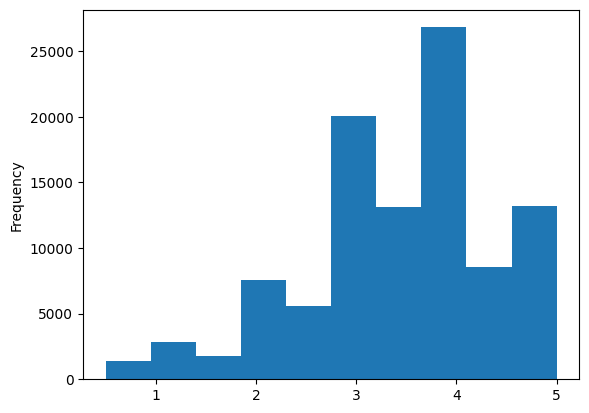

In [9]:
notas['nota'].plot(kind='hist')

Mediana:


In [10]:
notas['nota'].median()

3.5

Média e mediana:


In [11]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana: {mediana}')
print(f'Média: {media}')

Mediana: 3.5
Média: 3.501556983616962


Descrição da coluna referente as medidas:

In [12]:
notas['nota'].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


Descobrindo a concentração das notas:

<Axes: ylabel='nota'>

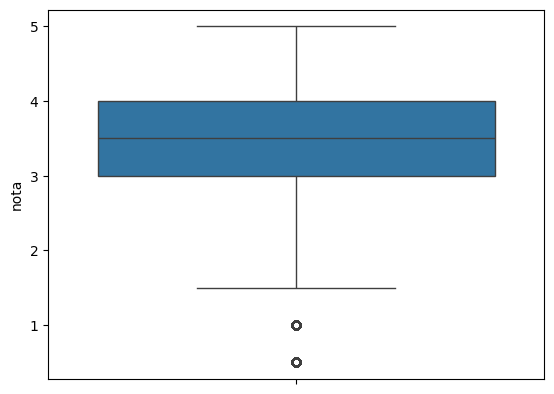

In [13]:
sns.boxplot(notas['nota'])

In [18]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/refs/heads/main/Aula_0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Pesquisa no dataframe:

Média de nota do filme 1

In [30]:
notas.query('filmeId==1')['nota'].mean()

np.float64(3.9209302325581397)

Média de nota do filme 2

In [31]:
notas.query('filmeId==2')['nota'].mean()

np.float64(3.4318181818181817)

Agrupando os filmes por ID e apresentando sua média
:

In [37]:
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

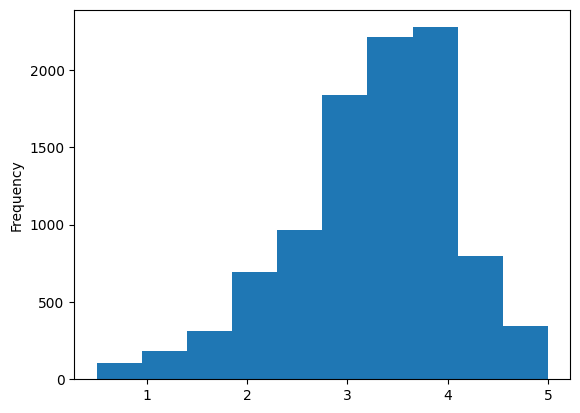

In [38]:
medias_por_filme.plot(kind='hist')

Descobrindo a mediana:

<Axes: ylabel='nota'>

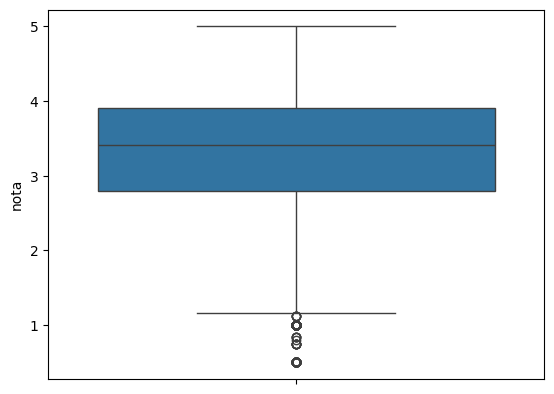

In [39]:
sns.boxplot(medias_por_filme)

Descrição:

In [42]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Criando um gráfico de distribuição de valores com Seaborn:

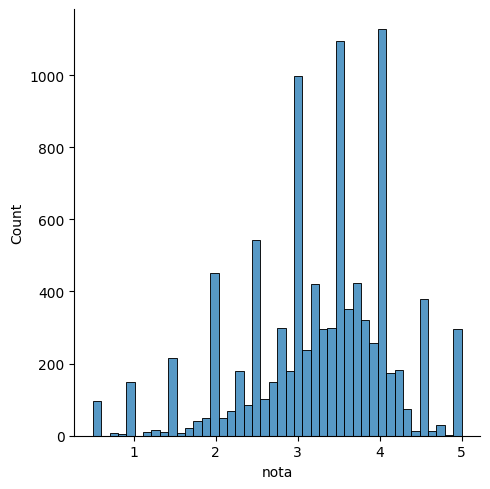

In [43]:
sns.displot(medias_por_filme)